In [1]:
import matplotlib


# 设置matplotlib以支持中文字体显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 加载数据
def load_data():
    # 加载Excel文件并返回DataFrame，确保列名与您的文件匹配
    data = pd.read_excel('附件一（训练集）.xlsx')  # 确保文件路径正确
    # 重命名列以符合您的数据集
    data.columns = ['温度，oC', '频率，Hz', '磁芯损耗，w/m3', '励磁波形'] + [f'磁通密度{j}' for j in range(1024)]
    return data

# 数据预处理
def preprocess_data(data):
    # 使用列号选择X和y
    X = data.iloc[:, 4:]  # 选择所有磁通密度列
    y = data.iloc[:, 2]   # 磁芯损耗是第三列
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# 构建神经网络模型
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

# 主函数
def main():
    data = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(data)
    input_shape = X_train.shape[1]  # 获取输入层的形状
    model = build_model(input_shape)
    model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
    predictions = model.predict(X_test)
    print(predictions)

if __name__ == '__main__':
    main()


Epoch 1/100
68/68 [==============================] - 1s 3ms/step - loss: 134522527744.0000 - val_loss: 198467092480.0000
Epoch 2/100
68/68 [==============================] - 0s 1ms/step - loss: 131027329024.0000 - val_loss: 189191143424.0000
Epoch 3/100
68/68 [==============================] - 0s 1ms/step - loss: 117017067520.0000 - val_loss: 164020502528.0000
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 93491691520.0000 - val_loss: 130013200384.0000
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 73566167040.0000 - val_loss: 106184679424.0000
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 62893907968.0000 - val_loss: 91673214976.0000
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 56676618240.0000 - val_loss: 80191496192.0000
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 52267089920.0000 - val_loss: 71336075264.0000
Epoch 9/100
68/68 [=====================

Epoch 1/100
68/68 [==============================] - 1s 3ms/step - loss: 134506315776.0000 - val_loss: 198417809408.0000
Epoch 2/100
68/68 [==============================] - 0s 2ms/step - loss: 131235266560.0000 - val_loss: 190217322496.0000
Epoch 3/100
68/68 [==============================] - 0s 1ms/step - loss: 119523344384.0000 - val_loss: 168614805504.0000
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 97742995456.0000 - val_loss: 136614723584.0000
Epoch 5/100
68/68 [==============================] - 0s 1ms/step - loss: 76134170624.0000 - val_loss: 107494727680.0000
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 62763876352.0000 - val_loss: 90119200768.0000
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 55848636416.0000 - val_loss: 77316661248.0000
Epoch 8/100
68/68 [==============================] - 0s 2ms/step - loss: 51078463488.0000 - val_loss: 69105606656.0000
Epoch 9/100
68/68 [=====================

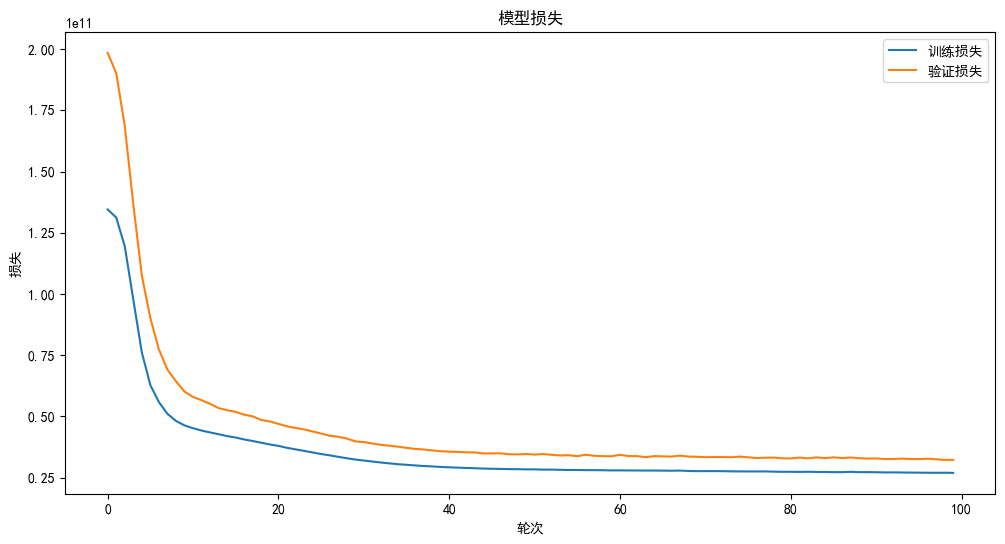

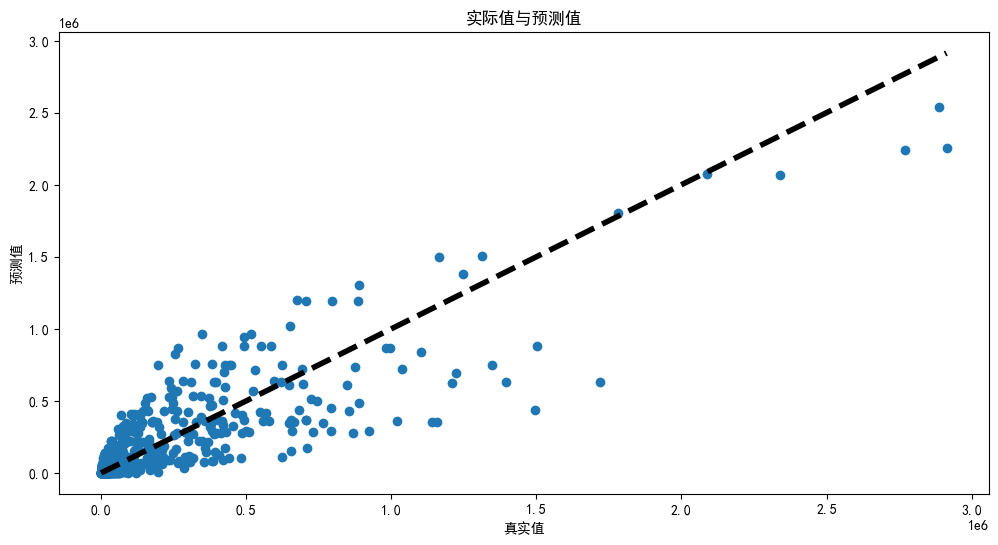

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 加载数据
def load_data():
    data = pd.read_excel('附件一（训练集）.xlsx')
    data.columns = ['温度，oC', '频率，Hz', '磁芯损耗，w/m3', '励磁波形'] + [f'磁通密度{j}' for j in range(1024)]
    return data

# 数据预处理
def preprocess_data(data):
    X = data.iloc[:, 4:]
    y = data.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# 构建神经网络模型
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

# 绘制训练历史
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='训练损失')
    plt.plot(history.history['val_loss'], label='验证损失')
    plt.title('模型损失')
    plt.ylabel('损失')
    plt.xlabel('轮次')
    plt.legend()
    plt.show()

# 绘制预测结果
def plot_predictions(y_test, predictions):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, predictions)
    plt.title('实际值与预测值')
    plt.xlabel('真实值')
    plt.ylabel('预测值')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.show()

# 主函数
def main():
    data = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(data)
    input_shape = X_train.shape[1]
    model = build_model(input_shape)
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
    predictions = model.predict(X_test)
    
    plot_history(history)
    plot_predictions(y_test, predictions)

if __name__ == '__main__':
    main()


Epoch 1/100
68/68 [==============================] - 0s 2ms/step - loss: 134442721280.0000 - val_loss: 198135906304.0000
Epoch 2/100
68/68 [==============================] - 0s 1ms/step - loss: 130480013312.0000 - val_loss: 188791619584.0000
Epoch 3/100
68/68 [==============================] - 0s 1ms/step - loss: 116653752320.0000 - val_loss: 164686741504.0000
Epoch 4/100
68/68 [==============================] - 0s 1ms/step - loss: 93638762496.0000 - val_loss: 134185500672.0000
Epoch 5/100
68/68 [==============================] - 0s 1ms/step - loss: 74907451392.0000 - val_loss: 109603233792.0000
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 65365692416.0000 - val_loss: 93641711616.0000
Epoch 7/100
68/68 [==============================] - 0s 1ms/step - loss: 58884358144.0000 - val_loss: 82520588288.0000
Epoch 8/100
68/68 [==============================] - 0s 1ms/step - loss: 53993590784.0000 - val_loss: 72794316800.0000
Epoch 9/100
68/68 [=====================

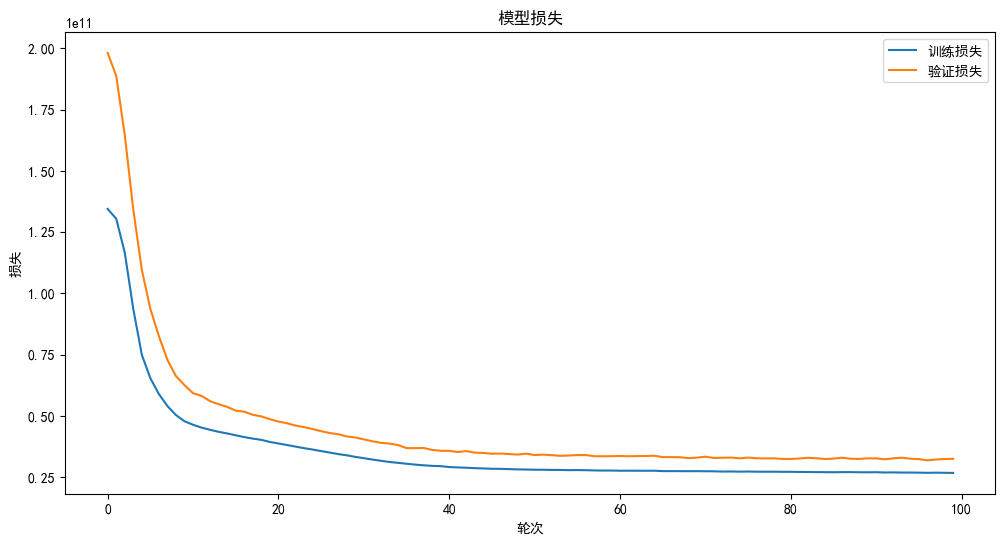

13/13 [==============================] - 0s 750us/step


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
def load_data(filepath):
    data = pd.read_excel(filepath)
    data.columns = ['温度，oC', '频率，Hz', '磁芯损耗，w/m3', '励磁波形'] + [f'磁通密度{j}' for j in range(1024)]
    return data

# 数据预处理
def preprocess_data(data):
    X = data.iloc[:, 4:]
    y = data.iloc[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

# 构建神经网络模型
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mse')
    return model

# 绘制训练历史
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='训练损失')
    plt.plot(history.history['val_loss'], label='验证损失')
    plt.title('模型损失')
    plt.ylabel('损失')
    plt.xlabel('轮次')
    plt.legend()
    plt.show()

# 预测并更新Excel表格
def predict_and_update(input_filepath, model, output_filepath):
    test_data = pd.read_excel(input_filepath)
    X_test = test_data.iloc[:, 5:1029].values
    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)
    predictions = model.predict(X_test_scaled).flatten()
    
    output_data = pd.read_excel(output_filepath)
    output_data['附件三（400个样品）磁芯损耗预测结果'] = predictions
    output_data.to_excel(output_filepath, index=False)

# 主函数
def main():
    train_data = load_data('附件一（训练集）.xlsx')
    X_train, X_test, y_train, y_test = preprocess_data(train_data)
    input_shape = X_train.shape[1]
    model = build_model(input_shape)
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
    
    plot_history(history)
    

    predict_and_update('附件三（测试集）.xlsx', model, '附件四（Excel表）.xlsx')

if __name__ == '__main__':
    main()


# 第五问

Iteration 0: Temp = 9900.00, Cost = 36795.52311579722
Iteration 100: Temp = 3623.72, Cost = 2566.4366814350005
Iteration 200: Temp = 1326.40, Cost = -7978.958271524999
Iteration 300: Temp = 485.50, Cost = -7978.958271524999
Iteration 400: Temp = 177.71, Cost = -11272.771377981666
Iteration 500: Temp = 65.05, Cost = -11272.771377981666
Iteration 600: Temp = 23.81, Cost = -11272.771377981666
Iteration 700: Temp = 8.72, Cost = -13625.024322829999
Iteration 800: Temp = 3.19, Cost = -13625.024322829999
Iteration 900: Temp = 1.17, Cost = -13625.024322829999
Optimized State: {'温度': 70, '频率': 281860, '磁通密度峰值': 0.061334190499999997}


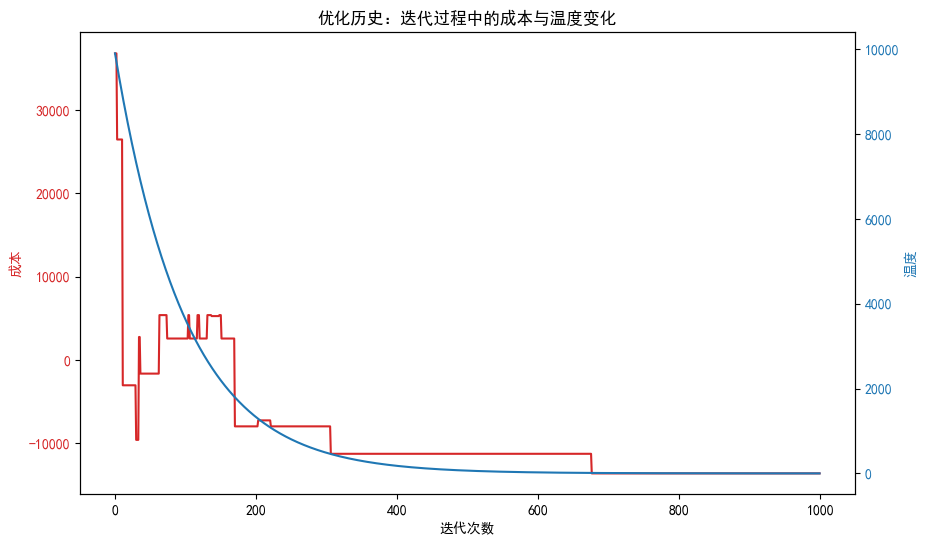

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

def load_data(filepath):
    data = pd.read_excel(filepath)
    # 数据预处理，确保列名匹配
    data.columns = ['温度，oC', '频率，Hz', '磁芯损耗，w/m3', '励磁波形'] + [str(j) for j in range(1024)]
    data['磁通密度峰值'] = data[[str(j) for j in range(1024)]].max(axis=1)
    return data

def simulated_annealing(data, initial_temp, cooling_rate, max_iterations):
    current_temp = initial_temp
    current_state = {
        '温度': random.choice(data['温度，oC'].unique()),
        '频率': random.choice(data['频率，Hz'].unique()),
        '磁通密度峰值': np.median(data['磁通密度峰值'])
    }
    current_cost = evaluate_cost(current_state, data)
    
    costs = []
    temperatures = []

    for i in range(max_iterations):
        next_state = get_neighbor(current_state, data)
        next_cost = evaluate_cost(next_state, data)

        cost_diff = next_cost - current_cost

        if cost_diff < 0 or np.exp(-cost_diff / current_temp) > random.random():
            current_state, current_cost = next_state, next_cost

        current_temp *= cooling_rate
        
        # 记录每次迭代的成本和温度
        costs.append(current_cost)
        temperatures.append(current_temp)

        if i % 100 == 0:
            print(f"Iteration {i}: Temp = {current_temp:.2f}, Cost = {current_cost}")

    return current_state, costs, temperatures


def evaluate_cost(state, data):
    loss = data[(data['温度，oC'] == state['温度']) & (data['频率，Hz'] == state['频率'])]['磁芯损耗，w/m3'].mean()
    energy = state['频率'] * state['磁通密度峰值']
    return loss - energy  # 损耗越小越好，能量越大越好

def get_neighbor(state, data):
    new_state = state.copy()
    if random.random() > 0.5:
        new_state['温度'] = random.choice(data['温度，oC'].unique())
    else:
        new_state['频率'] = random.choice(data['频率，Hz'].unique())
    return new_state

def plot_optimization_history(costs, temperatures):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 成本变化曲线
    color = 'tab:red'
    ax1.set_xlabel('迭代次数')
    ax1.set_ylabel('成本', color=color)
    ax1.plot(costs, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # 温度变化曲线
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('温度', color=color)
    ax2.plot(temperatures, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('优化历史：迭代过程中的成本与温度变化')
    plt.show()

# 主程序
file_path = '附件一（训练集）.xlsx'
data = load_data(file_path)
initial_temp = 10000
cooling_rate = 0.99
max_iterations = 1000

# 接收返回的最优状态以及成本和温度历史
optimal_state, costs, temperatures = simulated_annealing(data, initial_temp, cooling_rate, max_iterations)
print("Optimized State:", optimal_state)

# 使用返回的历史数据绘制图形
plot_optimization_history(costs, temperatures)
